<a href="https://colab.research.google.com/github/KaitoAMANO/EU_M_Math/blob/main/Chap08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import DataFrame, Series
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import sklearn


In [6]:
import requests, zipfile, io

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

auto.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

print(f'自動車データの形式:{auto.shape}')

自動車データの形式:(205, 26)


In [7]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
auto = auto[['price', 'horsepower', 'width', 'height']]
auto.isin(['?']).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

In [9]:
auto = auto.replace('?', np.nan).dropna()
print(f'自動車データの形式:{auto.shape}')

自動車データの形式:(199, 4)


In [10]:
print(f'データ型の確認(型変換前)\n{auto.dtypes}')

データ型の確認(型変換前)
price          object
horsepower     object
width         float64
height        float64
dtype: object


In [11]:
auto = auto.assign(price=pd.to_numeric(auto.price))
auto = auto.assign(horsepower=pd.to_numeric(auto.horsepower))
print(f'データ型の確認(型変換後)\n{auto.dtypes}')

データ型の確認(型変換後)
price           int64
horsepower      int64
width         float64
height        float64
dtype: object


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = auto.drop('price', axis=1)
y = auto['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

print(f'決定係数:{model.score(X_test, y_test):.3f}')
print(f'決定係数:{model.score(X_train, y_train):.3f}')

print(f'回帰係数:{pd.Series(model.coef_, index=X.columns)}')
print(f'切片:{model.intercept_:.3f}')

決定係数:0.737
決定係数:0.733
回帰係数:horsepower      81.651078
width         1829.174506
height         229.510077
dtype: float64
切片:-128409.046


In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X = auto.drop('price', axis=1)
y = auto['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

linear = LinearRegression()
ridge = Ridge(random_state=0)

for model in [linear, ridge]:
    model.fit(X_train, y_train)
    print(f'{model.__class__.__name__}(train):{model.score(X_train, y_train):.6f}')
    print(f'{model.__class__.__name__}(test):{model.score(X_test, y_test):.6f}')


LinearRegression(train):0.733358
LinearRegression(test):0.737069
Ridge(train):0.733355
Ridge(test):0.737768


In [14]:
import requests, zipfile, io

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

auto.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

auto = auto[['price', 'width', 'engine-size']]
auto = auto.replace('?', np.nan).dropna()
print(f'自動車データの形式:{auto.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

print(f'決定係数:{model.score(X_test, y_test):.3f}')
print(f'決定係数:{model.score(X_train, y_train):.3f}')

自動車データの形式:(201, 3)
決定係数:0.737
決定係数:0.733


# ラッソとリッジ回帰で用いられる正規化項式のメリット

・オーバーフィッティングの抑制
・変数選択の促進（ラッソ回帰）
・多重共線性の緩和
・汎化性能の向上

In [22]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

mushroom.columns = ['classes', 'cap-shape', 'cap_surface', 'cap_color', 'odor', 'bruises', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']

mushroom.head()

,classes,cap-shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [17]:
print(f'データの形式:{mushroom.shape}')
print(f'欠損の数:{mushroom.isnull().sum().sum()}')

データの形式:(8124, 23)
欠損の数:0


In [25]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color', 'gill_attachment', 'odor', 'cap_color']])
mushroom_dummy.head()


,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [26]:
mushroom_dummy['fig'] = mushroom['classes'].map(lambda x: 1 if x == 'p' else 0)

In [27]:
mushroom_dummy.groupby(['cap_color_c', 'fig'])['fig'].count().unstack()

fig,0,1
cap_color_c,,
False,4176,3904
True,32,12


In [28]:
mushroom_dummy.groupby(['gill_color_b', 'fig'])['fig'].count().unstack()

fig,0,1
gill_color_b,,
False,4208.0,2188.0
True,NaN,1728.0


In [33]:
- (0.5 * np.log2(0.5) + 0.5 * np.log2(0.5))

1.0

In [34]:
- (0.001 * np.log2(0.001) + 0.999 * np.log2(0.999))

0.011407757737461138

In [35]:
def calc_entropy(p):
    return - (p * np.log2(p) + (1 - p) * np.log2(1 - p))

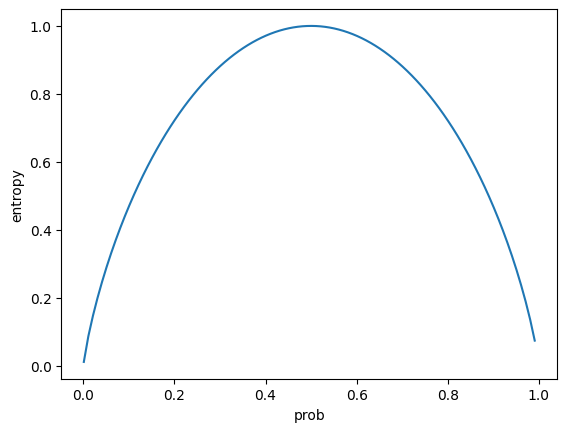

In [36]:
p = np.arange(0.001, 0.999, 0.01)

plt.plot(p, calc_entropy(p))
plt.xlabel('prob')
plt.ylabel('entropy')
plt.show()

In [37]:
mushroom_dummy.groupby('fig')['fig'].count()

fig
0    4208
1    3916
Name: fig, dtype: int64

In [38]:
entropy_init = - (0.518 * np.log2(0.518) + 0.482 * np.log2(0.482))
entropy_init

0.9990649315776107

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = mushroom_dummy.drop('fig', axis=1)
y = mushroom_dummy['fig']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train, y_train)

print()
print(f'決定係数:{model.score(X_test, y_test):.3f}')
print(f'決定係数:{model.score(X_train, y_train):.3f}')


決定係数:0.894
決定係数:0.883


In [44]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

model = LinearSVC(random_state=0)
model.fit(X_train, y_train)

print(f'決定係数:{model.score(X_test, y_test):.3f}')
print(f'決定係数:{model.score(X_train, y_train):.3f}')

決定係数:0.902
決定係数:0.899


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
student_data = pd.read_csv('student_data.csv')

X_train, X_test, y_train, y_test = train_test_split(X, student_data['G3'], random_state=0)

scores_train = []
scores_test = []

neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    scores_train.append(model.score(X_train, y_train))
    scores_test.append(model.score(X_test, y_test))

plt.plot(neighbors_settings, scores_train, label='train')
plt.plot(neighbors_settings, scores_test, label='test')
plt.legend()
plt.show

FileNotFoundError: [Errno 2] No such file or directory: 'student_data.csv'

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

print(f'決定係数:{model.score(X_test, y_test):.3f}')
print(f'決定係数:{model.score(X_train, y_train):.3f}')